# Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy.linalg import det, inv, pinv

# Functions

In [2]:
def transform_matrix(df_input, df_output,intercept=True):
    X = df_input
    Y = df_output

    model = linear_model.LinearRegression(fit_intercept=intercept).fit(X,Y)
    A = model.coef_
    n = model.intercept_
    score = round(model.score(X, Y),2)
        
    return np.array(A), np.array(n), np.array(score)

def multilineal_regressor(v_input, matrix):
    X = v_input.T
    A = matrix
    try:  
        Y =  inv(A.T.dot(A)).dot(A.T).dot(X)
    except:
        Y = pinv(A.T.dot(A)).dot(A.T).dot(X)
    return Y

def plot_prediction_error(sample, reference, prediction):
    figure_size = (6,4)
    fig = plt.figure(figsize=figure_size)
    plt.xlabel('sample')
    plt.ylabel(f'intensity')
    plt.plot(sample, label='sample', color='red')
    plt.plot(reference, label='reference', color='lime')
    plt.plot(prediction, label='prediction', color='yellow')
    plt.hlines(0, 0, len(reference))
    plt.legend()
    
    plt.figure(figsize=figure_size)
    #plt.title(''.join(reference.columns.tolist()) + f' - {coord}')
    plt.xlabel('reference')
    plt.ylabel('sample')
    plt.scatter(reference, sample, color='red')
    plt.plot(reference, reference, color='white')
    plt.xlim(min(min(reference), min(sample)),
             max(max(reference), max(sample)))
    plt.ylim(min(min(reference), min(sample)),
             max(max(reference), max(sample)))
    
    plt.figure(figsize=figure_size)
    #plt.title(''.join(reference.columns.tolist()) + f' - {coord}')
    plt.xlabel('reference')
    plt.ylabel('prediction')
    plt.scatter(reference, prediction, color='green')
    plt.plot(reference, reference, color='white')
    plt.xlim(min(min(reference), min(prediction)),
             max(max(reference), max(prediction)))
    plt.ylim(min(min(reference), min(prediction)),
             max(max(reference), max(prediction)))
    
    
def plot_sample_errorR(sample, error):
    figure_size = (6,4)
    plt.figure(figsize=figure_size)
    plt.xlabel('sample')
    plt.ylabel('error')
    plt.scatter(sample, error, color='red')
def plot_sample_errorG(sample, error):
    figure_size = (6,4)
    plt.figure(figsize=figure_size)
    plt.xlabel('sample')
    plt.ylabel('error')
    plt.scatter(sample, error, color='green')  
def plot_sample_errorB(sample, error):
    figure_size = (6,4)
    plt.figure(figsize=figure_size)
    plt.xlabel('sample')
    plt.ylabel('error')
    plt.scatter(sample, error, color='blue')   
    
    
def plot_prediction_errorR(prediction, error):
    figure_size = (6,4)
    plt.figure(figsize=figure_size)
    plt.xlabel('prediction')
    plt.ylabel('error')
    plt.scatter(prediction, error, color='red')
def plot_prediction_errorG(prediction, error):
    figure_size = (6,4)
    plt.figure(figsize=figure_size)
    plt.xlabel('prediction')
    plt.ylabel('error')
    plt.scatter(prediction, error, color='green') 
def plot_prediction_errorB(prediction, error):
    figure_size = (6,4)
    plt.figure(figsize=figure_size)
    plt.xlabel('prediction')
    plt.ylabel('error')
    plt.scatter(prediction, error, color='blue')
    
    

# Data

In [3]:
rgb = pd.read_csv('./RGB.csv', sep=';')
rgb2 = pd.read_csv('./RGB2.csv', sep=';')
type(rgb)

pandas.core.frame.DataFrame

## RGB & RGB2 Values

In [4]:
display(rgb, rgb2)
display(rgb2.to_numpy()-rgb.to_numpy())

,R,G,B
0,188.98,191.86,173.92
1,193.47,181.63,167.50
2,190.54,177.46,143.57
3,209.38,209.70,217.64
4,157.80,148.54,153.28
5,152.28,151.16,125.15
6,219.79,158.25,81.05
7,220.50,82.52,68.67
8,187.72,24.11,28.88
9,183.25,19.14,32.42


,R,G,B
0,202.081557,181.682362,128.060014
1,204.241453,171.769425,126.431581
2,207.301761,166.016873,104.929110
3,228.104200,208.239544,178.465140
4,163.938907,140.654004,116.715755
5,160.813355,140.130436,93.810744
6,230.784748,151.754790,72.154124
7,207.728206,90.734215,64.179945
8,161.591541,31.130920,24.162888
9,155.017449,18.200254,21.582083


array([[ 13.1015569 , -10.1776384 , -45.8599857 ],
       [ 10.7714532 ,  -9.8605747 , -41.0684185 ],
       [ 16.7617607 , -11.4431267 , -38.6408903 ],
       [ 18.7242001 ,  -1.460456  , -39.1748597 ],
       [  6.1389071 ,  -7.8859961 , -36.5642446 ],
       [  8.5333551 , -11.0295644 , -31.33925552],
       [ 10.994748  ,  -6.4952101 ,  -8.89587554],
       [-12.7717943 ,   8.2142147 ,  -4.49005486],
       [-26.1284587 ,   7.02091993,  -4.71711169],
       [-28.2325514 ,  -0.93974556, -10.83791699],
       [ -9.6769842 ,   8.4732023 ,   0.77467319],
       [  5.2617403 ,   9.39419029, -11.25837763],
       [ -8.9916788 ,  12.40647686,  -5.388741  ],
       [-15.1667695 ,  12.56402061,   2.34860558],
       [ -3.8875152 ,   3.3542094 , -22.7696463 ],
       [-19.6415264 ,  15.93486895,   5.74430469],
       [-11.5480104 ,   9.8062893 , -25.8232489 ],
       [  0.2204473 ,   3.5398498 , -40.3045786 ],
       [-18.2678355 ,  15.26611729, -13.41910772],
       [-21.8995441 ,  15.42019

## Sample Error

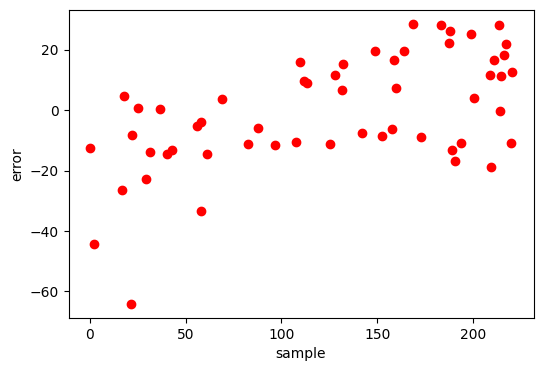

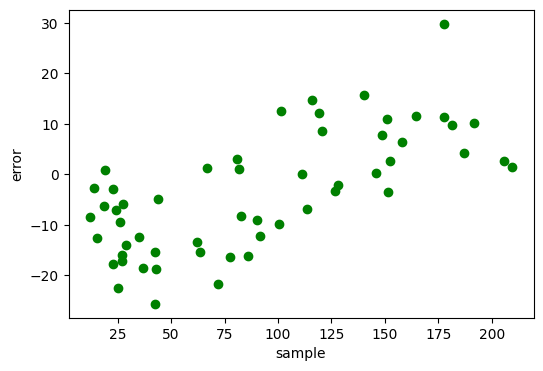

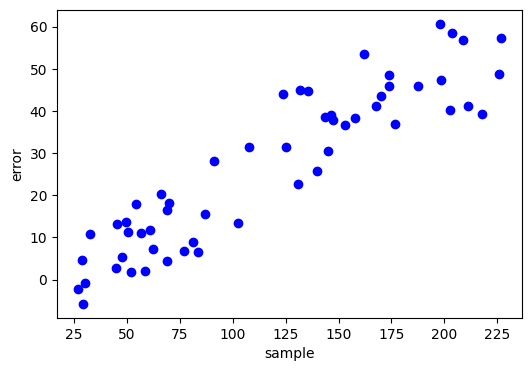

In [14]:
plot_sample_errorR(rgb.R, rgb.R-rgb2.R)
plot_sample_errorG(rgb.G, rgb.G-rgb2.G)
plot_sample_errorB(rgb.B, rgb.B-rgb2.B)

# Results

## Calculamos ecuación matricial de cambio de coordenadas RGB-RGB': $A·x + n = y$

In [15]:
A, n, score_rgb = transform_matrix(rgb, rgb2, intercept=True)
display(A, n, score_rgb)

array([[ 0.83945078,  0.29106125, -0.11051068],
       [ 0.04784397,  0.78011277,  0.12372494],
       [ 0.07507215,  0.04567634,  0.681342  ]])

array([ 7.27472887,  3.06992093, -3.19245315])

array(0.99)

In [16]:
v = A.dot(rgb.T).T
predictions = pd.DataFrame(v, columns=['R', 'G', 'B'])
display(predictions)
display(predictions.to_numpy()-rgb2.to_numpy())

,R,G,B
0,195.262403,180.232232,141.449598
1,196.763459,171.672184,136.945187
2,195.734664,165.318193,120.230241
3,212.748205,200.534715,173.584207
4,158.760495,142.392289,123.067250
5,157.997972,140.691703,103.606374
6,221.606440,143.996379,78.951158
7,201.528504,83.420693,67.110376
8,161.407639,31.362965,34.870957
9,155.817512,27.709928,36.720324


array([[-6.81915359e+00, -1.45012965e+00,  1.33895833e+01],
       [-7.47799391e+00, -9.72417251e-02,  1.05136055e+01],
       [-1.15670971e+01, -6.98680726e-01,  1.53011316e+01],
       [-1.53559950e+01, -7.70482867e+00, -4.88093282e+00],
       [-5.17841219e+00,  1.73828497e+00,  6.35149471e+00],
       [-2.81538262e+00,  5.61267349e-01,  9.79562904e+00],
       [-9.17830790e+00, -7.75841109e+00,  6.79703319e+00],
       [-6.19970187e+00, -7.31352169e+00,  2.93043052e+00],
       [-1.83901889e-01,  2.32045249e-01,  1.07080692e+01],
       [ 8.00063586e-01,  9.50967402e+00,  1.51382412e+01],
       [-8.14637324e+00, -2.02851435e+00, -1.35210482e+00],
       [-1.21819592e+01, -6.25907533e+00,  6.51261485e-01],
       [-4.30151992e+00, -8.77865479e+00,  3.22273580e-01],
       [-4.46311996e+00, -6.34486775e+00, -2.77138736e-01],
       [-5.86327757e+00, -5.46104384e+00,  1.93293223e+00],
       [-2.12215113e+00, -1.03614562e+01, -1.54140316e+00],
       [-8.24263811e+00, -4.58704873e+00

# RGB to RGB´ Error

## Red Value Error

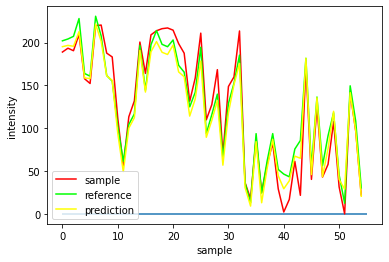

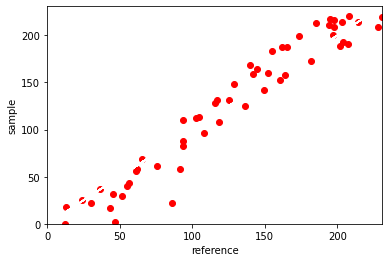

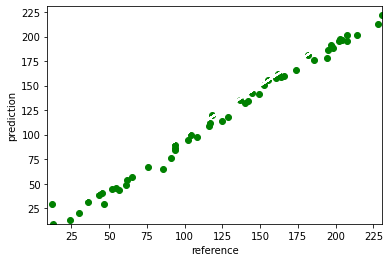

In [8]:
plot_prediction_error(rgb.R, rgb2.R,predictions.R)

## Green Value Error

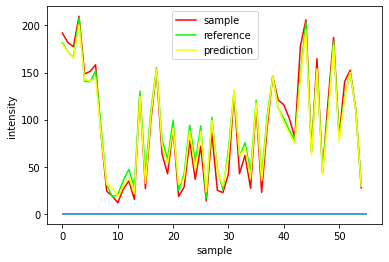

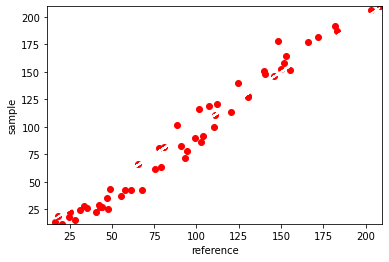

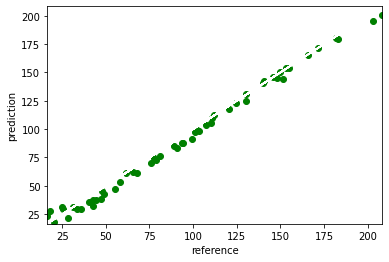

In [9]:
plot_prediction_error(rgb.G, rgb2.G,predictions.G)

## Blue Value Error

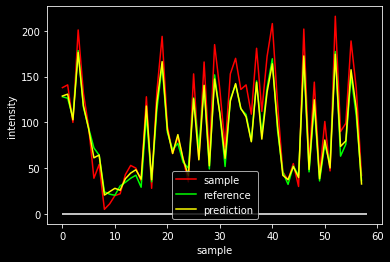

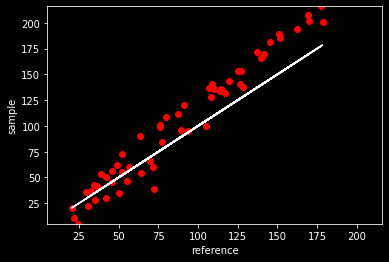

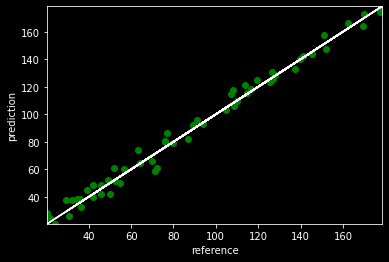

In [25]:
plot_prediction_error(rgb.B, rgb2.B,predictions.B)

# Plotting Results

## Sample RGB

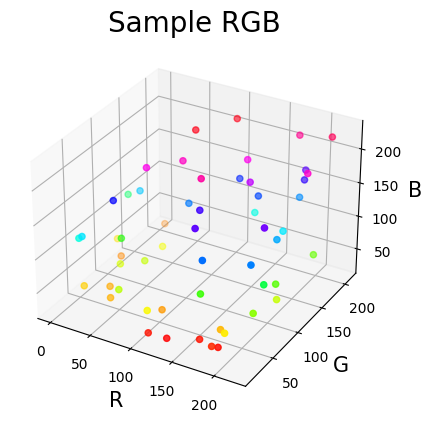

In [21]:
fig = plt.figure()
ax = plt.axes(projection="3d")
z_points = rgb.B
x_points = rgb.R
y_points = rgb.G
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
plt.title("Sample RGB", fontsize=20)
ax.set_xlabel('R', fontsize=15)
ax.set_ylabel('G', fontsize=15)
ax.set_zlabel('B', fontsize=15)
plt.show()

## Reference RGB

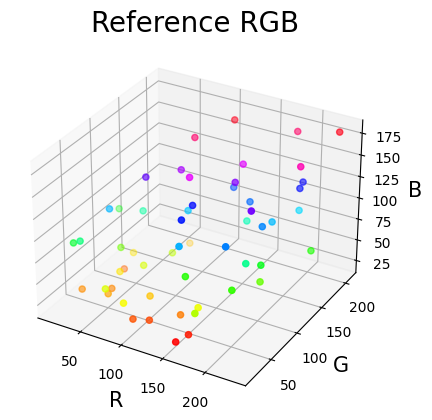

In [22]:
fig = plt.figure()
ax = plt.axes(projection="3d")
z_points = rgb2.B
x_points = rgb2.R
y_points = rgb2.G
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
plt.title("Reference RGB", fontsize=20)  
ax.set_xlabel('R', fontsize=15)
ax.set_ylabel('G', fontsize=15)
ax.set_zlabel('B', fontsize=15)
plt.show()

## Prediction RGB

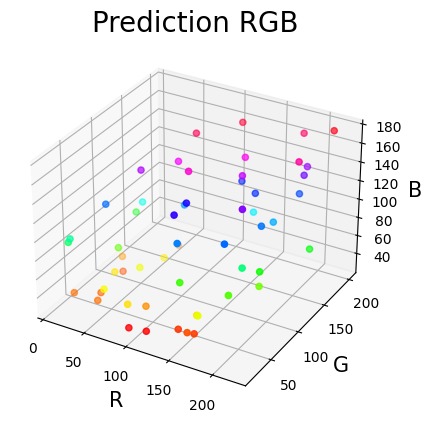

In [23]:
v = A.dot(rgb.T).T
predictions = pd.DataFrame(v, columns=['R', 'G', 'B'])

fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = predictions.B
x_points = predictions.R
y_points = predictions.G
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
plt.title("Prediction RGB", fontsize=20)
ax.set_xlabel('R', fontsize=15)
ax.set_ylabel('G', fontsize=15)
ax.set_zlabel('B', fontsize=15)
plt.show()

## Prediction Error

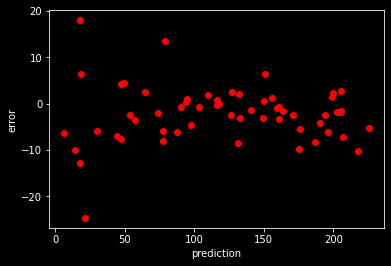

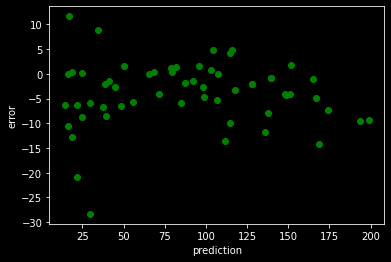

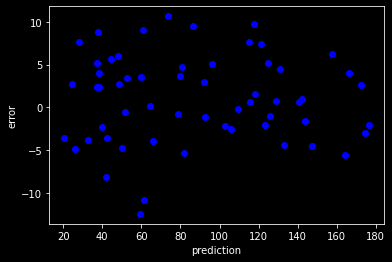

In [28]:
plot_prediction_errorR(predictions.R, predictions.R-rgb2.R)
plot_prediction_errorG(predictions.G, predictions.G-rgb2.G)
plot_prediction_errorB(predictions.B, predictions.B-rgb2.B)

# XYZColorToTemperature

In [29]:
def LERP(a,b,c):
    a,b,c = float(a), float(b), float(c)
    if c==0: result=a
    elif c==1: result=b
    else: result=(b-a)*c+a
    return result

class UVT:
    def __init__(self, U,V,T):
        self.u=U
        self.v=V
        self.t=T

# reciprocal temperature (K)
rt = ['DBL_MIN',
        10.0e-6,  20.0e-6,  30.0e-6,  40.0e-6,  50.0e-6,
        60.0e-6,  70.0e-6,  80.0e-6,  90.0e-6, 100.0e-6,
        125.0e-6, 150.0e-6, 175.0e-6, 200.0e-6, 225.0e-6,
        250.0e-6, 275.0e-6, 300.0e-6, 325.0e-6, 350.0e-6,
        375.0e-6, 400.0e-6, 425.0e-6, 450.0e-6, 475.0e-6,
        500.0e-6, 525.0e-6, 550.0e-6, 575.0e-6, 600.0e-6]


uvt_list = [(0.18006, 0.26352, -0.24341),
            (0.18066, 0.26589, -0.25479),
            (0.18133, 0.26846, -0.26876),
            (0.18208, 0.27119, -0.28539),
            (0.18293, 0.27407, -0.30470),
            (0.18388, 0.27709, -0.32675),
            (0.18494, 0.28021, -0.35156),
            (0.18611, 0.28342, -0.37915),
            (0.18740, 0.28668, -0.40955),
            (0.18880, 0.28997, -0.44278),
            (0.19032, 0.29326, -0.47888),
            (0.19462, 0.30141, -0.58204),
            (0.19962, 0.30921, -0.70471),
            (0.20525, 0.31647, -0.84901),
            (0.21142, 0.32312, -1.0182),
            (0.21807, 0.32909, -1.2168),
            (0.22511, 0.33439, -1.4512),
            (0.23247, 0.33904, -1.7298),
            (0.24010, 0.34308, -2.0637),
            (0.24792, 0.34655, -2.4681), #	/* Note: 0.24792 is a corrected value for the error found in W&S as 0.24702
            (0.25591, 0.34951, -2.9641),
            (0.26400, 0.35200, -3.5814),
            (0.27218, 0.35407, -4.3633),
            (0.28039, 0.35577, -5.3762),
            (0.28863, 0.35714, -6.7262),
            (0.29685, 0.35823, -8.5955),
            (0.30505, 0.35907, -11.324),
            (0.31320, 0.35968, -15.628),
            (0.32129, 0.36011, -23.325),
            (0.32931, 0.36038, -40.770),
            (0.33724, 0.36051, -116.45)] #31

uvt = list(map(lambda tpl: UVT(*tpl), uvt_list))


def XYZtoCorColorTemp(xyz):
    if (xyz[0] < 1.0e-20) & (xyz[1] < 1.0e-20) & (xyz[2] < 1.0e-20):
        log = 'Error: protect against possible divide-by-zero failure'
        return None,log

    us = (4.0 * xyz[0])/(xyz[0] + 15.0 * xyz[1] + 3.0 * xyz[2])
    vs = (6.0 * xyz[1])/(xyz[0] + 15.0 * xyz[1] + 3.0 * xyz[2])
    dm = 0
    
    i=0
    while i < 32:
        if i == 31:
            log = 'Bad XYZ input, color temp would be less than minimum of 1666.7 degrees, or too far towards blue'
            return None, log
    
        di = (vs - uvt[i].v) - uvt[i].t * (us - uvt[i].u)
        if ((i > 0) & (((di < 0) & (dm >= 0)) | ((di >= 0) & (dm < 0)))):
            log = f'i={i}: Found lines bounding (us, vs) : i-1 and i'
            break
        dm = di
        i += 1
    
    di = di/np.sqrt(1 + uvt[i].t**2)
    dm = dm/np.sqrt(1 + uvt[i-1].t**2)
    p = dm/(dm-di)    # p = interpolation parameter, 0.0 : i-1, 1.0 : i
    p = 1/(LERP(rt[i-1], rt[i], p))
    temperature = round(p, 2)
    log = 'OK'
    return temperature, log

In [30]:
XYZtoCorColorTemp((0.44,0.44,0.44))

(5454.03, 'OK')